In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [42]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [43]:
df.isna().sum() #No NaN columns which is good

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [44]:
df[df['price'] == 0].index #There are some rows where the price is just zero

Int64Index([4354, 4356, 4357, 4358, 4361, 4362, 4374, 4376, 4382, 4383, 4385,
            4386, 4389, 4394, 4405, 4408, 4411, 4412, 4413, 4420, 4442, 4448,
            4453, 4454, 4472, 4478, 4479, 4480, 4481, 4487, 4499, 4507, 4509,
            4520, 4521, 4522, 4523, 4528, 4534, 4542, 4552, 4554, 4555, 4558,
            4563, 4567, 4574, 4575, 4588],
           dtype='int64')

# Normalisation
Based on the previous conclusions we need to:
* Remove the zero prices rows from our dataset
* Remove the date column (no added value)
* Remove country column (no added value, only one unique value)

In [45]:
dft = df.copy()
dft = dft.drop(['date', 'country'], axis=1)

In [46]:
dft = dft[dft['price'] != 0]
dft = dft[dft['price'] < 3000000.0]

In [47]:
def normalize(columns):
    for column in columns:
        dft[column] = dft[column] / (dft[column].max() - dft[column].min())

dft['price'].max()

2888000.0

In [48]:
normalize(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'floors', 'waterfront', 'yr_built', 'view'])

<AxesSubplot:>

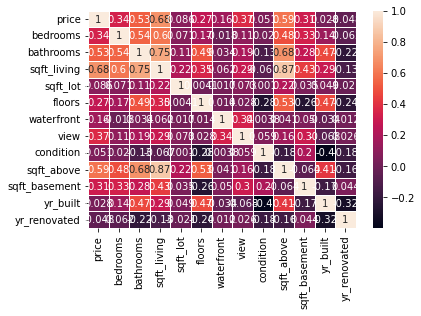

In [49]:
sns.heatmap(dft.corr(), annot=True, linewidths=1)

# Conclusion

There a few features that have a high corralation with the price that I am trying to predict.
Based on this I can identify the features we need for the price prediction.

* Bedrooms
* Bathrooms
* sqft-living
* sqft-above
* sqft-basement

As you can see I didn't take view into a account because of the unknown origin of the column.
This is why we cannot ask users to fill in a unknown property of their house. This is why I went with these five.

We also didn't take into account the street adress and city where the person might live. This could have big impact. But due to the limitations of the model we just take these values for the areas Sydney & Melbourne. (This is based on the description of the dataset)

# Model training

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [61]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'floors', 'waterfront']

In [62]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(dft[features])

In [63]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [64]:
linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.05),
    loss='mean_absolute_error',
    metrics=['accuracy']
)

In [65]:
history = linear_model.fit(
    x=dft[features],
    y=dft['price'],
    epochs=500,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/500
29/29 [==============================] - 1s 17ms/step - loss: 0.2332 - accuracy: 0.0000e+00 - val_loss: 0.1482 - val_accuracy: 0.0000e+00
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1374 - accuracy: 0.0000e+00 - val_loss: 0.1319 - val_accuracy: 0.0000e+00
Epoch 3/500
29/29 [==============================] - 0s 6ms/step - loss: 0.1207 - accuracy: 0.0000e+00 - val_loss: 0.1171 - val_accuracy: 0.0000e+00
Epoch 4/500
29/29 [==============================] - 0s 6ms/step - loss: 0.1049 - accuracy: 0.0000e+00 - val_loss: 0.1028 - val_accuracy: 0.0000e+00
Epoch 5/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.0000e+00 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 6/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.0000e+00 - val_loss: 0.0815 - val_accuracy: 0.0000e+00
Epoch 7/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.0000e+00 - 

29/29 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.0000e+00 - val_loss: 0.0618 - val_accuracy: 0.0000e+00
Epoch 56/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.0000e+00 - val_loss: 0.0617 - val_accuracy: 0.0000e+00
Epoch 57/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0543 - accuracy: 0.0000e+00 - val_loss: 0.0626 - val_accuracy: 0.0000e+00
Epoch 58/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0541 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 59/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0542 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 60/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0540 - accuracy: 0.0000e+00 - val_loss: 0.0618 - val_accuracy: 0.0000e+00
Epoch 61/500
29/29 [==============================] - 0s 8ms/step - loss: 0.0540 - accuracy: 0.0000e+00 - val_los

29/29 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 110/500
29/29 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0612 - val_accuracy: 0.0000e+00
Epoch 111/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0619 - val_accuracy: 0.0000e+00
Epoch 112/500
29/29 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 113/500
29/29 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0612 - val_accuracy: 0.0000e+00
Epoch 114/500
29/29 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 115/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0628 - val_accuracy: 0.0000e+00
Epoch 164/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.0000e+00 - val_loss: 0.0683 - val_accuracy: 0.0000e+00
Epoch 165/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0612 - val_accuracy: 0.0000e+00
Epoch 166/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 167/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 168/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0619 - val_accuracy: 0.0000e+00
Epoch 169/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.0000e+00 - val_loss: 0.0612 - val_accuracy: 0.0000e+00
Epoch 218/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0616 - val_accuracy: 0.0000e+00
Epoch 219/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0656 - val_accuracy: 0.0000e+00
Epoch 220/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0616 - val_accuracy: 0.0000e+00
Epoch 221/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - val_loss: 0.0637 - val_accuracy: 0.0000e+00
Epoch 222/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_accuracy: 0.0000e+00
Epoch 223/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0615 - val_accuracy: 0.0000e+00
Epoch 272/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0633 - val_accuracy: 0.0000e+00
Epoch 273/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0615 - val_accuracy: 0.0000e+00
Epoch 274/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 275/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 276/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 277/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 326/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 327/500
29/29 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0648 - val_accuracy: 0.0000e+00
Epoch 328/500
29/29 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 329/500
29/29 [==============================] - 0s 6ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 330/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0618 - val_accuracy: 0.0000e+00
Epoch 331/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 380/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 381/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 382/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0629 - val_accuracy: 0.0000e+00
Epoch 383/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0615 - val_accuracy: 0.0000e+00
Epoch 384/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0635 - val_accuracy: 0.0000e+00
Epoch 385/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 434/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 435/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 436/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 437/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 438/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0537 - accuracy: 0.0000e+00 - val_loss: 0.0667 - val_accuracy: 0.0000e+00
Epoch 439/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - v

29/29 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0640 - val_accuracy: 0.0000e+00
Epoch 488/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_accuracy: 0.0000e+00
Epoch 489/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.0000e+00 - val_loss: 0.0626 - val_accuracy: 0.0000e+00
Epoch 490/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 491/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 492/500
29/29 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0627 - val_accuracy: 0.0000e+00
Epoch 493/500
29/29 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - v

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
linear_model.save('weights')